# FoldX, FoldXwater ve EvoEF1 run scriptlerin kontolü

In [60]:
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import scipy.stats

rootdir = pathlib.Path('.').resolve(strict=True)
datadir = rootdir.parents [1] / 'ace2-rbd-point-mutation-benchmark/files/input_files' # githuba koyup analizleri yaptığımız dosyalar
newfiles = rootdir.parents [1] / 'ace2-rbd-point-mutation-benchmark/run_scripts_errors/files' # yeni ürettiğimiz scorelar

## EvoEF1

EVoEF1 scorelarını modified pdb ile üretmişiz.

In [61]:
EvoEF1_github = pd.read_csv(datadir / 'EvoEF1_scores.csv', delimiter=',')
EvoEF1_github.columns=['#case_id','EvoEF1_github']
EvoEF1_github=EvoEF1_github.set_index('#case_id')

EvoEF1_originalpdb = pd.read_csv(newfiles / 'EvoEF1_scores_originalpdb.csv', delimiter=',')
EvoEF1_originalpdb.columns=['#case_id','EvoEF1_originalpdb']
EvoEF1_originalpdb=EvoEF1_originalpdb.set_index('#case_id')

EvoEF1_modifiedpdb = pd.read_csv(newfiles / 'EvoEF1_scores_modifiedpdb.csv', delimiter=',')
EvoEF1_modifiedpdb.columns=['#case_id','EvoEF1_modifiedpdb']
EvoEF1_modifiedpdb=EvoEF1_modifiedpdb.set_index('#case_id')

EvoEF1 = pd.concat([EvoEF1_github, EvoEF1_originalpdb, EvoEF1_modifiedpdb ], axis=1)


1.0

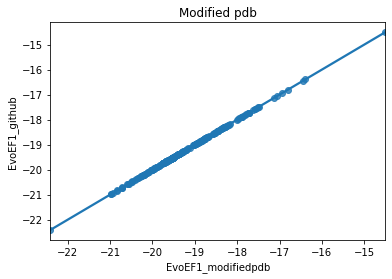

In [62]:
ax = sns.regplot(x="EvoEF1_modifiedpdb", y="EvoEF1_github", data=EvoEF1)
ax.set_title('Modified pdb')

r, p = scipy.stats.pearsonr(EvoEF1['EvoEF1_modifiedpdb'], EvoEF1['EvoEF1_github'])
r 

0.9470407429671726

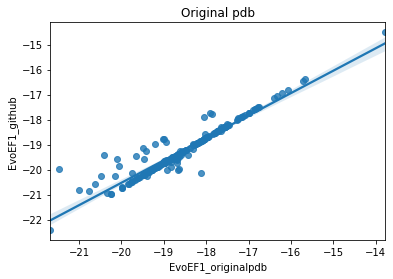

In [63]:
ax = sns.regplot(x="EvoEF1_originalpdb", y="EvoEF1_github", data=EvoEF1)
ax.set_title('Original pdb')

r, p = scipy.stats.pearsonr(EvoEF1['EvoEF1_originalpdb'], EvoEF1['EvoEF1_github'])
r 

## FoldX

FoldX için run scriptini original 6m0j ile çalıştırdığımızda farklı sonuçlar elde ediyoruz. 

Not: modifiye 6moj ile çalıştırdığımızda da farklı sonuçlar elde ediyoruz

In [66]:
FoldX_github = pd.read_csv(datadir / 'FoldX_scores.csv', delimiter=',')
FoldX_github=FoldX_github.set_index('#case_id')

FoldX_originalpdb = pd.read_csv(newfiles / 'FoldX_originalpdb.csv', delimiter=',')
FoldX_originalpdb =FoldX_originalpdb.set_index('#case_id')

FoldX = pd.concat([FoldX_github, FoldX_originalpdb], axis=1)


0.8964210014145187

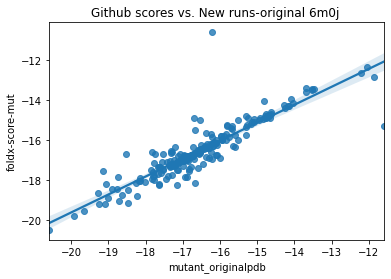

In [67]:
ax2 = sns.regplot(x="mutant_originalpdb", y="foldx-score-mut", data=FoldX)
ax2.set_title('Github scores vs. New runs-original 6m0j ')

r, p = scipy.stats.pearsonr(FoldX['mutant_originalpdb'], FoldX['foldx-score-mut'])
r

## FoldXwater

In [68]:
FoldXwater_github = pd.read_csv(datadir / 'FoldXwater_scores.csv', delimiter=',')
FoldXwater_github=FoldXwater_github.set_index('#case_id')